In [50]:
import pandas as pd

In [51]:
df = pd.read_excel('FasterCNNresults.xlsx')

In [52]:
df

,image_file_name,score_dict
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0...."
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927..."
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0...."
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}"
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'..."
...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0...."
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '..."
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ..."
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}"


In [53]:
import pandas as pd

# Function to process the score_dict and filter values
def process_score_dict(score_dict_str, threshold=0.645):
    try:
        row_dict = eval(score_dict_str)
        remaining_values = {}
        for key, value_str in row_dict.items():
            values = [val.strip() for val in value_str.split(',') if float(val.strip()) >= threshold]
            if values:
                remaining_values[key] = ', '.join(values)
        return str(remaining_values)  # Convert the dictionary back to a string
    except (SyntaxError, TypeError):
        return str({})

# Apply the function to each row and create a new column 'remaining_values'
df['remaining_values'] = df['score_dict'].apply(process_score_dict)

# Display the DataFrame with the added 'remaining_values' column
df


,image_file_name,score_dict,remaining_values
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0...."
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927..."
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0...."
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}"
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}"
...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0...."
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p..."
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ..."
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}"


In [54]:
import pandas as pd

# Function to count values for the key 'person'
def count_person_values(row):
    try:
        row_dict = eval(row)
        if 'person' in row_dict:
            return len(row_dict['person'].split(','))
        else:
            return 0
    except (SyntaxError, TypeError):
        return 0

# Apply the function to each row and create a new column 'person_count'
df['person_count'] = df['remaining_values'].apply(count_person_values)

# Display the DataFrame with the added 'person_count' column
df


,image_file_name,score_dict,remaining_values,person_count
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....",8
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927...",2
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....",5
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}",1
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}",1
...,...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0....",2
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p...",3
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ...",1
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}",1


In [55]:
# Function to process the remaining_values and remove 'person' key
def remove_person_key(remaining_values_str):
    try:
        row_dict = eval(remaining_values_str)
        row_dict.pop('person', None)  # Remove 'person' key if present
        return str(row_dict)  # Convert the dictionary back to a string
    except (SyntaxError, TypeError):
        return remaining_values_str

# Apply the function to each row and create a new column 'without_people'
df['without_people'] = df['remaining_values'].apply(remove_person_key)

# Display the DataFrame with the added 'without_people' column
df

,image_file_name,score_dict,remaining_values,person_count,without_people
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....",8,"{'tie': '0.9933', 'cup': '0.8608, 0.8214'}"
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927...",2,"{'bottle': '0.9927', 'boat': '0.9520', 'sink':..."
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....",5,"{'chair': '0.9835', 'cell phone': '0.8128'}"
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}",1,{'potted plant': '0.8602'}
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}",1,{'chair': '0.8809'}
...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0....",2,"{'cell phone': '0.8943', 'chair': '0.7798'}"
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p...",3,"{'potted plant': '0.9537, 0.7485', 'vase': '0...."
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ...",1,"{'car': '0.9602, 0.9584', 'tie': '0.9397'}"
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}",1,{'tie': '0.6576'}


In [56]:
# Function to extract unique keys from a dictionary string
def extract_unique_keys(dict_str):
    try:
        row_dict = eval(dict_str)
        return list(row_dict.keys())
    except (SyntaxError, TypeError):
        return []

# Apply the function to each row in the 'without_people' column
unique_keys = set()  # To store the unique keys
for value in df['without_people']:
    unique_keys.update(extract_unique_keys(value))

# Print the unique keys
print("Unique keys in the 'without_people' column:")
print(unique_keys)

Unique keys in the 'without_people' column:
{'bus', 'vase', 'cup', 'airplane', 'sports ball', 'toaster', 'train', 'mouse', 'cake', 'watch', 'scissors', 'zebra', 'knife', 'cow', 'skateboard', 'refrigerator', 'laptop', 'dining table', 'traffic light', 'stop sign', 'fire hydrant', 'motorcycle', 'giraffe', 'banana', 'suitcase', 'book', 'umbrella', 'dog', 'bowl', 'toothbrush', 'frisbee', 'remote', 'cat', 'boat', 'bench', 'donut', 'sandwich', 'broccoli', 'bird', 'baseball glove', 'backpack', 'apple', 'tv', 'bicycle', 'baseball bat', 'carrot', 'toilet', 'couch', 'chair', 'skis', 'horse', 'tennis racket', 'bed', 'parking meter', 'cell phone', 'potted plant', 'kite', 'hot dog', 'bear', 'surfboard', 'handbag', 'fork', 'snowboard', 'elephant', 'hair drier', 'tie', 'microwave', 'sheep', 'spoon', 'pizza', 'keyboard', 'oven', 'orange', 'truck', 'wine glass', 'bottle', 'sink', 'teddy bear', 'car'}


In [57]:
# Function to count the number of values for each key in the 'without_people' column
def count_values(row):
    try:
        row_dict = eval(row)
        value_count_dict = {key: len(val.split(',')) if val else 0 for key, val in row_dict.items()}
        return value_count_dict
    except (SyntaxError, TypeError):
        return {}

# Apply the function to each row and create a new column 'value_count'
df['value_count'] = df['without_people'].apply(count_values)

# Display the updated DataFrame with the 'value_count' column
df

,image_file_name,score_dict,remaining_values,person_count,without_people,value_count
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....",8,"{'tie': '0.9933', 'cup': '0.8608, 0.8214'}","{'tie': 1, 'cup': 2}"
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927...",2,"{'bottle': '0.9927', 'boat': '0.9520', 'sink':...","{'bottle': 1, 'boat': 1, 'sink': 1}"
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....",5,"{'chair': '0.9835', 'cell phone': '0.8128'}","{'chair': 1, 'cell phone': 1}"
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}",1,{'potted plant': '0.8602'},{'potted plant': 1}
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}",1,{'chair': '0.8809'},{'chair': 1}
...,...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0....",2,"{'cell phone': '0.8943', 'chair': '0.7798'}","{'cell phone': 1, 'chair': 1}"
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p...",3,"{'potted plant': '0.9537, 0.7485', 'vase': '0....","{'potted plant': 2, 'vase': 1}"
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ...",1,"{'car': '0.9602, 0.9584', 'tie': '0.9397'}","{'car': 2, 'tie': 1}"
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}",1,{'tie': '0.6576'},{'tie': 1}


In [58]:
# Define the categories and their respective keys
categories = {
    'vehicle_pic': ['car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'bicycle'],
    'animal_pic': ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'mouse'],
    'food_pic': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
                 'spoon', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'bowl', 'dining table'],
    'sport_pic': ['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'],
    'clothing_pic': ['hat', 'backpack', 'umbrella', 'shoe', 'eyeglasses', 'handbag', 'tie', 'suitcase', 'person', 'watch'],
    'indoor_objects_pic': ['chair', 'couch', 'bed', 'mirror', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop',
                           'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
                           'blender', 'book', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hairbrush'],
    'outdoor_objects_pic': ['traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'potted plant']
}

# Function to sum the values for keys within each category
def sum_values_per_category(value_count_dict, category_keys):
    category_sums = {category: sum(value_count_dict.get(key, 0) for key in keys) for category, keys in category_keys.items()}
    return category_sums

# Apply the function to each row and create new columns for each category
for category, keys in categories.items():
    df[category] = df['value_count'].apply(lambda x: sum_values_per_category(x, {category: keys})[category])

# Display the updated DataFrame with the new columns
df

,image_file_name,score_dict,remaining_values,person_count,without_people,value_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....",8,"{'tie': '0.9933', 'cup': '0.8608, 0.8214'}","{'tie': 1, 'cup': 2}",0,0,2,0,1,0,0
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927...",2,"{'bottle': '0.9927', 'boat': '0.9520', 'sink':...","{'bottle': 1, 'boat': 1, 'sink': 1}",1,0,1,0,0,1,0
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....",5,"{'chair': '0.9835', 'cell phone': '0.8128'}","{'chair': 1, 'cell phone': 1}",0,0,0,0,0,2,0
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}",1,{'potted plant': '0.8602'},{'potted plant': 1},0,0,0,0,0,0,1
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}",1,{'chair': '0.8809'},{'chair': 1},0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0....",2,"{'cell phone': '0.8943', 'chair': '0.7798'}","{'cell phone': 1, 'chair': 1}",0,0,0,0,0,2,0
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p...",3,"{'potted plant': '0.9537, 0.7485', 'vase': '0....","{'potted plant': 2, 'vase': 1}",0,0,0,0,0,1,2
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ...",1,"{'car': '0.9602, 0.9584', 'tie': '0.9397'}","{'car': 2, 'tie': 1}",2,0,0,0,1,0,0
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}",1,{'tie': '0.6576'},{'tie': 1},0,0,0,0,1,0,0


In [59]:
# Rename the 'image_file_name' column to 'image_name'
df.rename(columns={'image_file_name': 'image_name'}, inplace=True)
df

,image_name,score_dict,remaining_values,person_count,without_people,value_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic
0,BTalBkFFbS3.jpg,"{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....","{'person': '0.9982, 0.9921, 0.9395, 0.8308, 0....",8,"{'tie': '0.9933', 'cup': '0.8608, 0.8214'}","{'tie': 1, 'cup': 2}",0,0,2,0,1,0,0
1,BSuylNHBDUq.jpg,"{'person': '0.9988, 0.9987', 'bottle': '0.9927...","{'person': '0.9988, 0.9987', 'bottle': '0.9927...",2,"{'bottle': '0.9927', 'boat': '0.9520', 'sink':...","{'bottle': 1, 'boat': 1, 'sink': 1}",1,0,1,0,0,1,0
2,BSuwz-FBb_z.jpg,"{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....","{'person': '0.9977, 0.9959, 0.9947, 0.8615, 0....",5,"{'chair': '0.9835', 'cell phone': '0.8128'}","{'chair': 1, 'cell phone': 1}",0,0,0,0,0,2,0
3,BS0MNFuBU0a.jpg,"{'person': '0.9582', 'potted plant': '0.8602'}","{'person': '0.9582', 'potted plant': '0.8602'}",1,{'potted plant': '0.8602'},{'potted plant': 1},0,0,0,0,0,0,1
4,BTBnELSBPu4.jpg,"{'person': '0.9966', 'chair': '0.8809, 0.5812'...","{'person': '0.9966', 'chair': '0.8809'}",1,{'chair': '0.8809'},{'chair': 1},0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,"{'person': '0.9953, 0.7625', 'cell phone': '0....","{'person': '0.9953, 0.7625', 'cell phone': '0....",2,"{'cell phone': '0.8943', 'chair': '0.7798'}","{'cell phone': 1, 'chair': 1}",0,0,0,0,0,2,0
15484,BTbVjelgkzz.jpg,"{'person': '0.9976, 0.8137, 0.6859, 0.5910', '...","{'person': '0.9976, 0.8137, 0.6859', 'potted p...",3,"{'potted plant': '0.9537, 0.7485', 'vase': '0....","{'potted plant': 2, 'vase': 1}",0,0,0,0,0,1,2
15485,BStivGcAkKw.jpg,"{'person': '0.9997', 'car': '0.9602, 0.9584', ...","{'person': '0.9997', 'car': '0.9602, 0.9584', ...",1,"{'car': '0.9602, 0.9584', 'tie': '0.9397'}","{'car': 2, 'tie': 1}",2,0,0,0,1,0,0
15486,BSv5u9VA5Le.jpg,"{'person': '0.9983', 'tie': '0.6576'}","{'person': '0.9983', 'tie': '0.6576'}",1,{'tie': '0.6576'},{'tie': 1},0,0,0,0,1,0,0


In [60]:
# Drop the specified columns from the DataFrame 'df'
df.drop(columns=['score_dict', 'remaining_values', 'without_people', 'value_count'], inplace=True)
df

,image_name,person_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic
0,BTalBkFFbS3.jpg,8,0,0,2,0,1,0,0
1,BSuylNHBDUq.jpg,2,1,0,1,0,0,1,0
2,BSuwz-FBb_z.jpg,5,0,0,0,0,0,2,0
3,BS0MNFuBU0a.jpg,1,0,0,0,0,0,0,1
4,BTBnELSBPu4.jpg,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,2,0,0,0,0,0,2,0
15484,BTbVjelgkzz.jpg,3,0,0,0,0,0,1,2
15485,BStivGcAkKw.jpg,1,2,0,0,0,1,0,0
15486,BSv5u9VA5Le.jpg,1,0,0,0,0,1,0,0


In [61]:
df6 = pd.read_excel('dataset_final6.xlsx')

In [62]:
df

,image_name,person_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic
0,BTalBkFFbS3.jpg,8,0,0,2,0,1,0,0
1,BSuylNHBDUq.jpg,2,1,0,1,0,0,1,0
2,BSuwz-FBb_z.jpg,5,0,0,0,0,0,2,0
3,BS0MNFuBU0a.jpg,1,0,0,0,0,0,0,1
4,BTBnELSBPu4.jpg,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
15483,BTYQL08ACvz.jpg,2,0,0,0,0,0,2,0
15484,BTbVjelgkzz.jpg,3,0,0,0,0,0,1,2
15485,BStivGcAkKw.jpg,1,2,0,0,0,1,0,0
15486,BSv5u9VA5Le.jpg,1,0,0,0,0,1,0,0


In [63]:
df6

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,...,min_er,sentiment_score,image_name,Image width,Image height,Image size (KB),colorfulness,noise_and_artifacts,sharpness,clarity
0,giannis_an34,804699,107,BTalBkFFbS3,5,8,NaN,NaN,While walking off the court today fans were te...,0,...,0.064358,1.9738,BTalBkFFbS3.jpg,1080,1069,171.064453,200.059890,88.515626,154.918392,9735.307750
1,giannis_an34,804699,107,BSuylNHBDUq,2,8,nationalsiblingsday,"francisadetokunbo, thanasis_ante43",#NationalSiblingsDay @francisadetokunbo @thana...,1,...,0.077485,1.0000,BSuylNHBDUq.jpg,1080,1080,188.892578,99.048532,78.111334,706.438254,14573.235609
2,giannis_an34,804699,107,BSuwz-FBb_z,2,7,nationalsiblingsday,"kostas__ante13, alex_ante34, thanasis_ante43",The best brothers/Friends ever. They always ha...,1,...,0.064358,1.6696,BSuwz-FBb_z.jpg,1080,1080,216.256836,114.091437,79.532562,3243.761707,18254.250953
3,elenimenegaki,636249,78,BS0MNFuBU0a,4,10,"eleni, elenimenegaki, blackandwhite",NaN,#eleni #elenimenegaki #blackandwhite,3,...,0.056269,1.0000,BS0MNFuBU0a.jpg,1080,1090,167.751953,46.444774,94.282626,1538.303536,19005.235168
4,elenimenegaki,636249,78,BTBnELSBPu4,2,15,"eleni, elenimenegaki, styling","serendipitygr, sinacheri",#eleni #elenimenegaki Φόρεμα @serendipitygr #s...,3,...,0.056269,1.0000,BTBnELSBPu4.jpg,1080,1080,87.270508,153.993744,65.074815,63.063377,2347.584443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,andreanafrangoudes,11820,869,BTYQL08ACvz,4,10,"gymlife, morningroutine",NaN,Let's do it 💪 #gymlife #morningroutine,2,...,0.022927,1.0000,BTYQL08ACvz.jpg,900,1125,161.979492,59.509943,87.259314,421.488812,21070.567202
15484,andreanafrangoudes,11820,869,BTbVjelgkzz,5,15,"stonpiretotoushow, gettingshowready",NaN,Ετοιμαζόμαστεεεε 😱 see u all on Monday!! #ston...,2,...,0.022927,1.0000,BTbVjelgkzz.jpg,1080,1349,333.039062,263.109786,100.407043,1666.629138,22815.370753
15485,marinoskonsolos,44213,167,BStivGcAkKw,1,20,NaN,NaN,""" Sometimes if you wear suits for too long, it...",0,...,0.141678,1.0000,BStivGcAkKw.jpg,960,1107,214.600586,230.945715,104.557896,3439.497095,22969.990477
15486,marinoskonsolos,44213,167,BSv5u9VA5Le,2,18,"elastithesimou, tvseries, downtownmagazine, ph...",NaN,""" The more you act like a lady, the more i act...",4,...,0.150861,1.6734,BSv5u9VA5Le.jpg,914,914,68.805664,33.019010,67.140833,107.567807,4317.203621


In [64]:
# Merge all columns from df and df6 into a single DataFrame based on 'image_name'
merged_df = df6.merge(df, on='image_name', how='left')

# Display the merged DataFrame
merged_df

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,...,sharpness,clarity,person_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic
0,giannis_an34,804699,107,BTalBkFFbS3,5,8,NaN,NaN,While walking off the court today fans were te...,0,...,154.918392,9735.307750,8,0,0,2,0,1,0,0
1,giannis_an34,804699,107,BSuylNHBDUq,2,8,nationalsiblingsday,"francisadetokunbo, thanasis_ante43",#NationalSiblingsDay @francisadetokunbo @thana...,1,...,706.438254,14573.235609,2,1,0,1,0,0,1,0
2,giannis_an34,804699,107,BSuwz-FBb_z,2,7,nationalsiblingsday,"kostas__ante13, alex_ante34, thanasis_ante43",The best brothers/Friends ever. They always ha...,1,...,3243.761707,18254.250953,5,0,0,0,0,0,2,0
3,elenimenegaki,636249,78,BS0MNFuBU0a,4,10,"eleni, elenimenegaki, blackandwhite",NaN,#eleni #elenimenegaki #blackandwhite,3,...,1538.303536,19005.235168,1,0,0,0,0,0,0,1
4,elenimenegaki,636249,78,BTBnELSBPu4,2,15,"eleni, elenimenegaki, styling","serendipitygr, sinacheri",#eleni #elenimenegaki Φόρεμα @serendipitygr #s...,3,...,63.063377,2347.584443,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,andreanafrangoudes,11820,869,BTYQL08ACvz,4,10,"gymlife, morningroutine",NaN,Let's do it 💪 #gymlife #morningroutine,2,...,421.488812,21070.567202,2,0,0,0,0,0,2,0
15484,andreanafrangoudes,11820,869,BTbVjelgkzz,5,15,"stonpiretotoushow, gettingshowready",NaN,Ετοιμαζόμαστεεεε 😱 see u all on Monday!! #ston...,2,...,1666.629138,22815.370753,3,0,0,0,0,0,1,2
15485,marinoskonsolos,44213,167,BStivGcAkKw,1,20,NaN,NaN,""" Sometimes if you wear suits for too long, it...",0,...,3439.497095,22969.990477,1,2,0,0,0,1,0,0
15486,marinoskonsolos,44213,167,BSv5u9VA5Le,2,18,"elastithesimou, tvseries, downtownmagazine, ph...",NaN,""" The more you act like a lady, the more i act...",4,...,107.567807,4317.203621,1,0,0,0,0,1,0,0


In [65]:
merged_df.to_excel('dataset_final7.xlsx', index=False)

#### Run from here

In [66]:
df = pd.read_excel('dataset_final7.xlsx')

In [67]:
# Move the 'num_likes' column to the rightmost position
cols = df.columns.tolist()
cols.remove('num_likes')  # Remove the 'num_likes' column
cols.append('num_likes')  # Append the 'num_likes' column at the end
df = df[cols]  # Reorder the columns in the DataFrame

# Display the resulting DataFrame
df

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,...,clarity,person_count,vehicle_pic,animal_pic,food_pic,sport_pic,clothing_pic,indoor_objects_pic,outdoor_objects_pic,num_likes
0,giannis_an34,804699,107,BTalBkFFbS3,5,8,NaN,NaN,While walking off the court today fans were te...,0,...,9735.307750,8,0,0,2,0,1,0,0,158338
1,giannis_an34,804699,107,BSuylNHBDUq,2,8,nationalsiblingsday,"francisadetokunbo, thanasis_ante43",#NationalSiblingsDay @francisadetokunbo @thana...,1,...,14573.235609,2,1,0,1,0,0,1,0,51447
2,giannis_an34,804699,107,BSuwz-FBb_z,2,7,nationalsiblingsday,"kostas__ante13, alex_ante34, thanasis_ante43",The best brothers/Friends ever. They always ha...,1,...,18254.250953,5,0,0,0,0,0,2,0,62250
3,elenimenegaki,636249,78,BS0MNFuBU0a,4,10,"eleni, elenimenegaki, blackandwhite",NaN,#eleni #elenimenegaki #blackandwhite,3,...,19005.235168,1,0,0,0,0,0,0,1,49729
4,elenimenegaki,636249,78,BTBnELSBPu4,2,15,"eleni, elenimenegaki, styling","serendipitygr, sinacheri",#eleni #elenimenegaki Φόρεμα @serendipitygr #s...,3,...,2347.584443,1,0,0,0,0,0,1,0,46541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,andreanafrangoudes,11820,869,BTYQL08ACvz,4,10,"gymlife, morningroutine",NaN,Let's do it 💪 #gymlife #morningroutine,2,...,21070.567202,2,0,0,0,0,0,2,0,397
15484,andreanafrangoudes,11820,869,BTbVjelgkzz,5,15,"stonpiretotoushow, gettingshowready",NaN,Ετοιμαζόμαστεεεε 😱 see u all on Monday!! #ston...,2,...,22815.370753,3,0,0,0,0,0,1,2,423
15485,marinoskonsolos,44213,167,BStivGcAkKw,1,20,NaN,NaN,""" Sometimes if you wear suits for too long, it...",0,...,22969.990477,1,2,0,0,0,1,0,0,7387
15486,marinoskonsolos,44213,167,BSv5u9VA5Le,2,18,"elastithesimou, tvseries, downtownmagazine, ph...",NaN,""" The more you act like a lady, the more i act...",4,...,4317.203621,1,0,0,0,0,1,0,0,6223


#### Split the dataset

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)

# Split the DataFrame into 80% for training and 20% for testing
df_train, df_test = train_test_split(df_shuffled, test_size=0.2, random_state=42)

In [69]:
# Select numeric columns using the 'select_dtypes()' method
df_train = df_train.select_dtypes(include=['int64', 'float64'])
df_test = df_test.select_dtypes(include=['int64', 'float64'])

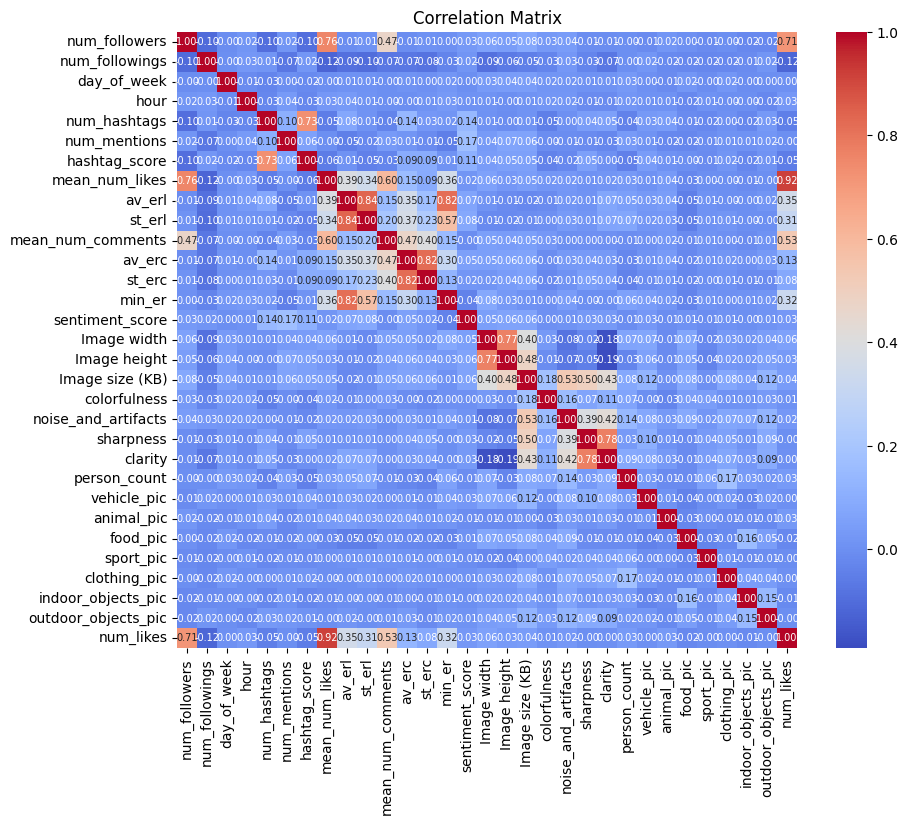

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 7})  # Adjust fontsize here
plt.title('Correlation Matrix')
plt.show()

In [71]:
# Prepare the data
X_train, X_test = df_train.iloc[:, :-1], df_test.iloc[:, :-1]  # Features (all columns except the last one)
y_train, y_test = df_train.iloc[:, -1], df_test.iloc[:, -1]   # Target variable (last column)

In [72]:
# to find other metrics too

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

# Your code to prepare the X_train, X_test, y_train, and y_test data goes here.

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(random_state=1, max_iter=500)
]

# Create an empty list to store the evaluation results
results_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    rae = np.sum(np.abs(y_pred - y_test)) / np.sum(np.abs(y_test - np.mean(y_test)))  # Calculate RAE
    rrse = np.sqrt(np.sum((y_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))  # Calculate RRSE
    r2 = r2_score(y_test, y_pred)

    # Append the model evaluation results as a dictionary to the list
    results_list.append({
        'Model': model_name,
        'MAPE': mape,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'RAE': rae,
        'RRSE': rrse,
        'R2': r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame with the model evaluation results
results_df

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MAPE,MSE,MAE,RMSE,RAE,RRSE,R2
0,LinearRegression,0.507807,2.912434e+06,646.215336,1706.585436,0.262490,0.340747,0.883891
1,Ridge,0.507844,2.912513e+06,646.227872,1706.608570,0.262496,0.340752,0.883888
2,Lasso,0.500014,2.910051e+06,644.425356,1705.887190,0.261763,0.340608,0.883986
3,ElasticNet,0.717808,4.685383e+06,796.426846,2164.574621,0.323506,0.432192,0.813210
4,DecisionTreeRegressor,0.249339,3.175804e+06,498.002582,1782.078606,0.202287,0.355821,0.873392
5,RandomForestRegressor,0.206289,1.514635e+06,388.298770,1230.704962,0.157726,0.245730,0.939617
6,GradientBoostingRegressor,0.496576,1.720974e+06,558.594377,1311.858908,0.226899,0.261934,0.931391
7,KNeighborsRegressor,0.969644,3.782315e+06,878.997934,1944.817528,0.357046,0.388314,0.849212
8,MLPRegressor,0.596191,3.066629e+06,681.746430,1751.179231,0.276923,0.349651,0.877744


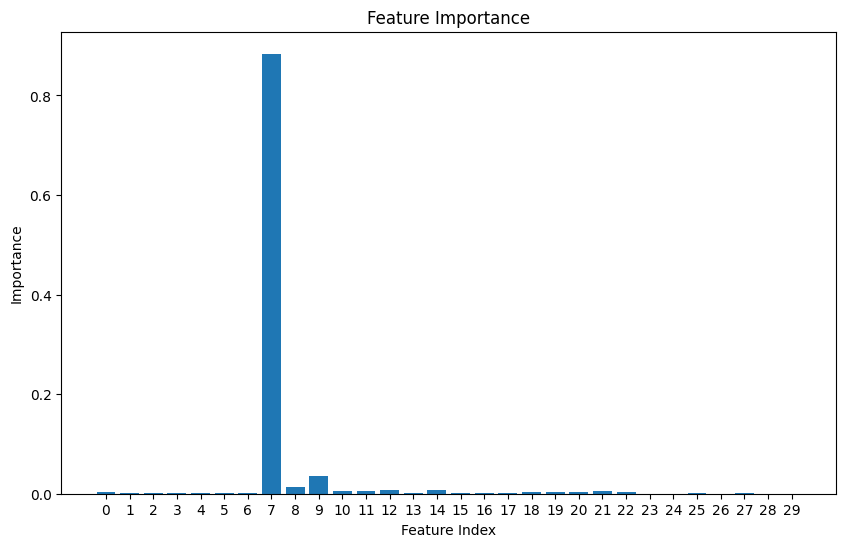

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already defined X_train, X_test, y_train, y_test as numpy arrays

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=1)

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_

# Get the corresponding feature names
feature_names = np.arange(X_train.shape[1])

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(feature_importance_df['Feature'])
plt.show()


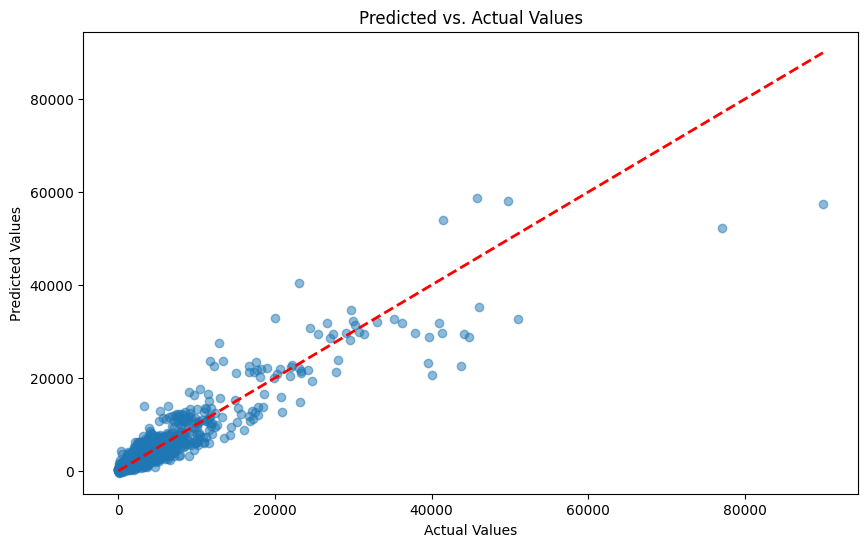

In [74]:
# Plotting predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()